In [67]:
import pandas as pd
from prophet import Prophet

In [50]:
df=pd.read_csv('Amazon.csv')

In [51]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 319.6+ KB


In [53]:
df['Date']=pd.to_datetime(df['Date'])

In [54]:
df.drop(['High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [55]:
df=df.rename(columns={'Date':'ds','Close':'y'})

In [76]:
df

,ds,Open,y
0,1997-05-15,2.437500,1.958333
1,1997-05-16,1.968750,1.729167
2,1997-05-19,1.760417,1.708333
3,1997-05-20,1.729167,1.635417
4,1997-05-21,1.635417,1.427083
...,...,...,...
5837,2020-07-27,3062.000000,3055.209961
5838,2020-07-28,3054.270020,3000.330078
5839,2020-07-29,3030.989990,3033.530029
5840,2020-07-30,3014.000000,3051.879883


In [136]:
model=Prophet()

model.fit(df)


21:42:22 - cmdstanpy - INFO - Chain [1] start processing
21:42:27 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
future=model.make_future_dataframe(periods=1825)

In [138]:
predict=model.predict(future)

In [139]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-05-15,-11.747680,-117.641700,103.779473,-11.747680,-11.747680,7.623447,7.623447,7.623447,-2.217203,-2.217203,-2.217203,9.840650,9.840650,9.840650,0.0,0.0,0.0,-4.124233
1,1997-05-16,-11.651624,-125.442162,101.048026,-11.651624,-11.651624,5.637202,5.637202,5.637202,-3.635703,-3.635703,-3.635703,9.272906,9.272906,9.272906,0.0,0.0,0.0,-6.014422
2,1997-05-19,-11.363457,-125.389872,104.616344,-11.363457,-11.363457,4.907401,4.907401,4.907401,-3.152514,-3.152514,-3.152514,8.059915,8.059915,8.059915,0.0,0.0,0.0,-6.456056
3,1997-05-20,-11.267401,-122.598555,96.765233,-11.267401,-11.267401,5.425050,5.425050,5.425050,-2.430710,-2.430710,-2.430710,7.855760,7.855760,7.855760,0.0,0.0,0.0,-5.842350
4,1997-05-21,-11.171345,-121.123614,111.075263,-11.171345,-11.171345,5.467563,5.467563,5.467563,-2.296048,-2.296048,-2.296048,7.763611,7.763611,7.763611,0.0,0.0,0.0,-5.703782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,2025-07-26,4300.752582,4091.012038,4599.758642,4071.214831,4533.592275,46.453988,46.453988,46.453988,6.866089,6.866089,6.866089,39.587900,39.587900,39.587900,0.0,0.0,0.0,4347.206571
7663,2025-07-27,4301.837213,4088.623070,4588.622136,4071.962817,4534.890509,44.169408,44.169408,44.169408,6.866089,6.866089,6.866089,37.303319,37.303319,37.303319,0.0,0.0,0.0,4346.006621
7664,2025-07-28,4302.921844,4071.821405,4589.432314,4072.867117,4536.188743,31.721074,31.721074,31.721074,-3.152514,-3.152514,-3.152514,34.873588,34.873588,34.873588,0.0,0.0,0.0,4334.642919
7665,2025-07-29,4304.006475,4082.465066,4593.980862,4073.868966,4537.486977,29.897947,29.897947,29.897947,-2.430710,-2.430710,-2.430710,32.328657,32.328657,32.328657,0.0,0.0,0.0,4333.904423


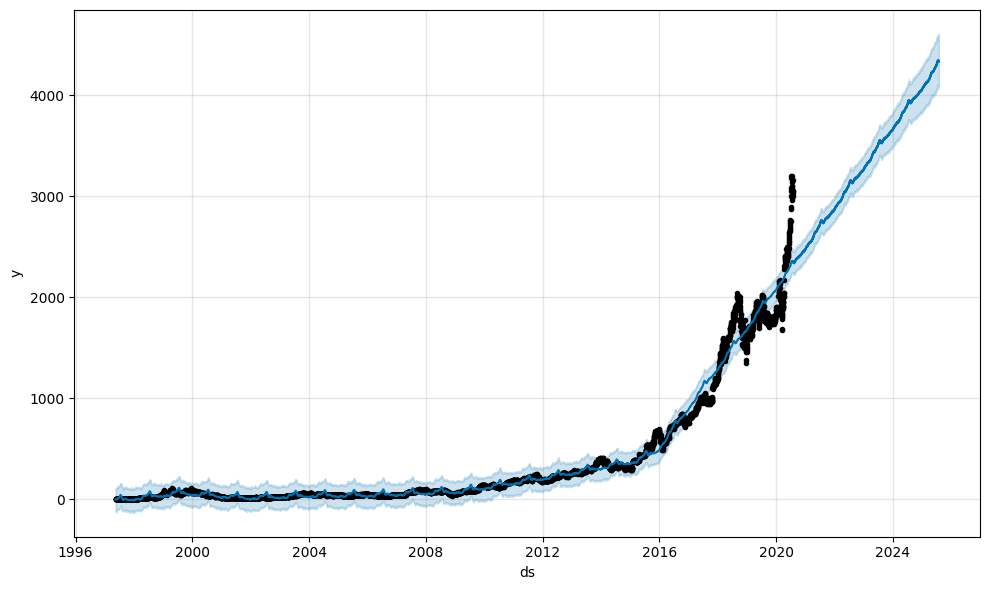

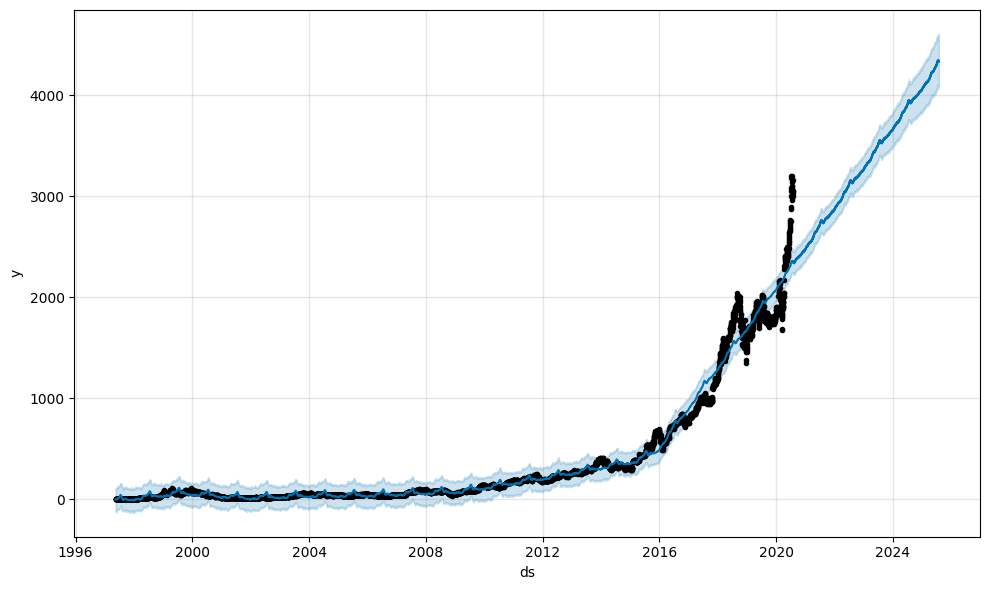

In [140]:
model.plot(predict)

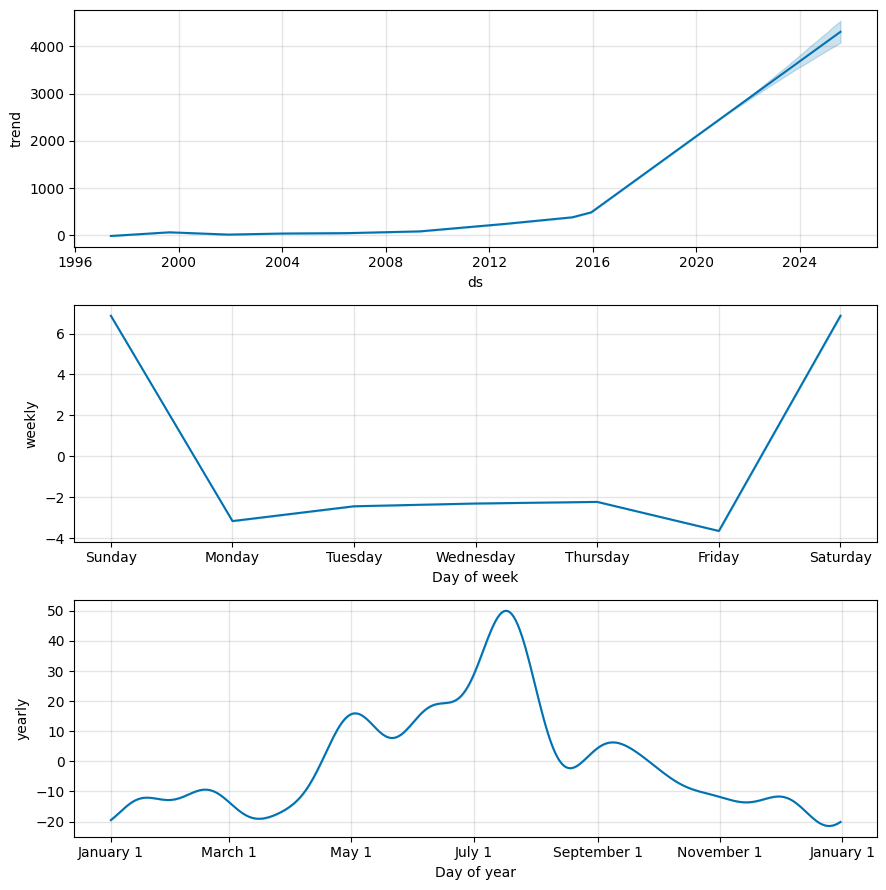

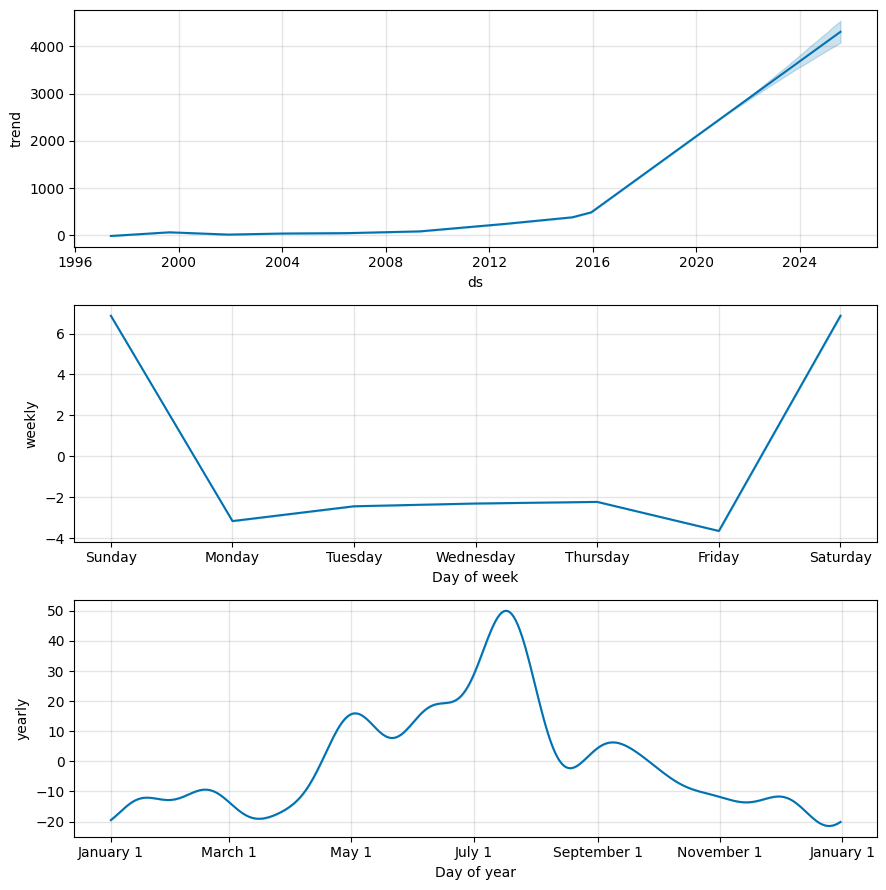

In [141]:
model.plot_components(predict)

In [148]:
y=input('year')

m=input('month(mm)')
d=input('day(dd)')


In [149]:
date=y+'-'+m+'-'+d

In [150]:
predict[predict['ds']==date]['yhat'].values[0]

3189.8056070152766

In [115]:
from datetime import date as dt

In [119]:
dt.today()

2022-10-02


In [167]:
fg=predict

In [169]:
idx=fg.index[fg['ds']==date][0]

In [170]:
idx

6634

In [159]:
fg

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-05-15,-11.747680,-117.641700,103.779473,-11.747680,-11.747680,7.623447,7.623447,7.623447,-2.217203,-2.217203,-2.217203,9.840650,9.840650,9.840650,0.0,0.0,0.0,-4.124233
1,1997-05-16,-11.651624,-125.442162,101.048026,-11.651624,-11.651624,5.637202,5.637202,5.637202,-3.635703,-3.635703,-3.635703,9.272906,9.272906,9.272906,0.0,0.0,0.0,-6.014422
2,1997-05-19,-11.363457,-125.389872,104.616344,-11.363457,-11.363457,4.907401,4.907401,4.907401,-3.152514,-3.152514,-3.152514,8.059915,8.059915,8.059915,0.0,0.0,0.0,-6.456056
3,1997-05-20,-11.267401,-122.598555,96.765233,-11.267401,-11.267401,5.425050,5.425050,5.425050,-2.430710,-2.430710,-2.430710,7.855760,7.855760,7.855760,0.0,0.0,0.0,-5.842350
4,1997-05-21,-11.171345,-121.123614,111.075263,-11.171345,-11.171345,5.467563,5.467563,5.467563,-2.296048,-2.296048,-2.296048,7.763611,7.763611,7.763611,0.0,0.0,0.0,-5.703782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,2022-09-27,3180.328673,3049.432838,3308.569395,3122.597284,3238.487193,-2.613880,-2.613880,-2.613880,-2.430710,-2.430710,-2.430710,-0.183171,-0.183171,-0.183171,0.0,0.0,0.0,3177.714793
6630,2022-09-28,3181.413304,3046.873397,3302.924928,3123.591677,3239.730019,-3.004830,-3.004830,-3.004830,-2.296048,-2.296048,-2.296048,-0.708783,-0.708783,-0.708783,0.0,0.0,0.0,3178.408474
6631,2022-09-29,3182.497935,3055.832710,3312.964501,3124.592689,3240.915392,-3.453581,-3.453581,-3.453581,-2.217203,-2.217203,-2.217203,-1.236378,-1.236378,-1.236378,0.0,0.0,0.0,3179.044354
6632,2022-09-30,3183.582566,3057.229470,3300.574097,3125.593701,3242.100765,-5.399812,-5.399812,-5.399812,-3.635703,-3.635703,-3.635703,-1.764109,-1.764109,-1.764109,0.0,0.0,0.0,3178.182754


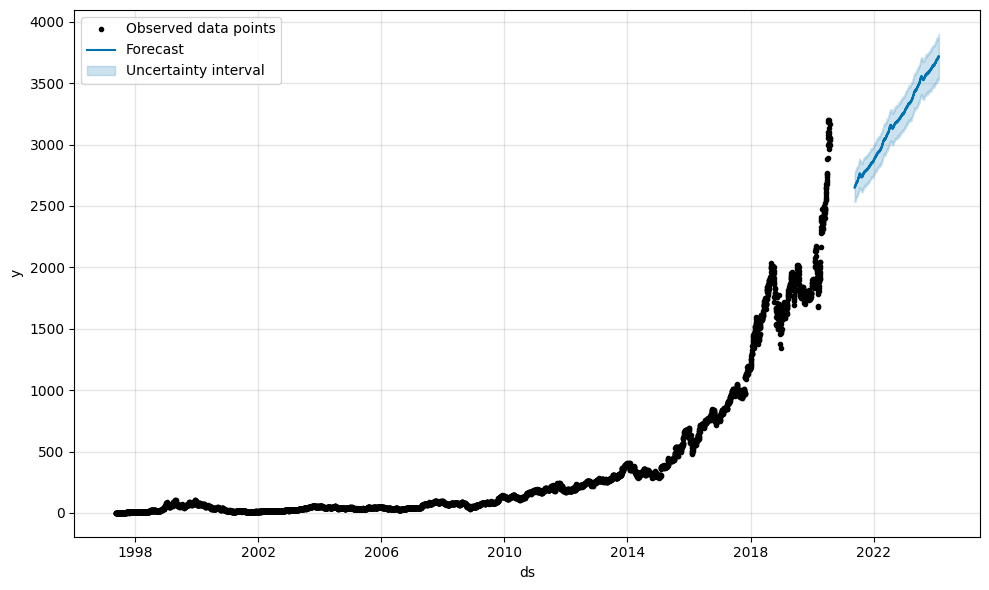

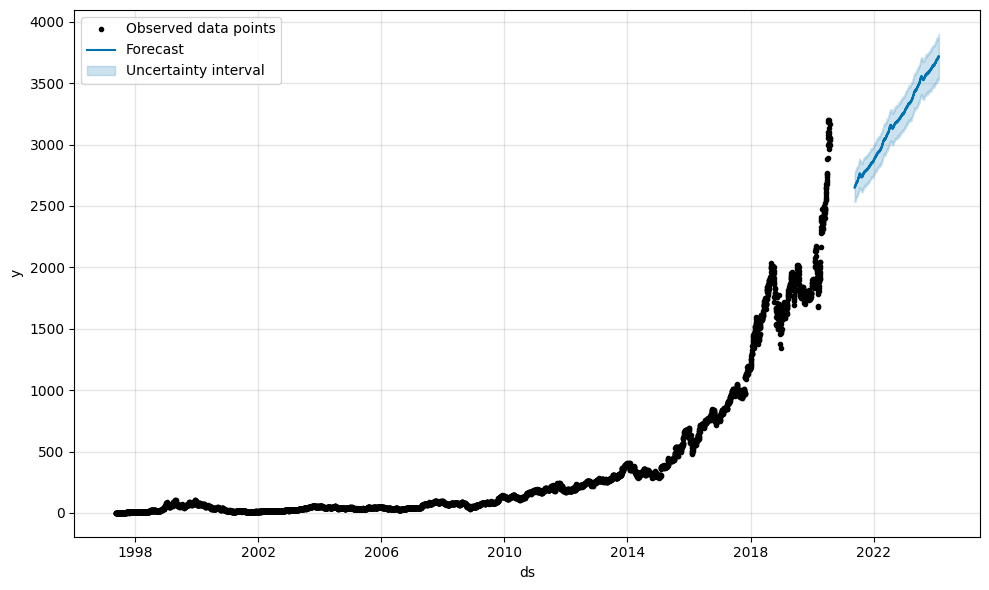

In [172]:
model.plot(fg.iloc[-500+idx:idx+500,:],include_legend=True)

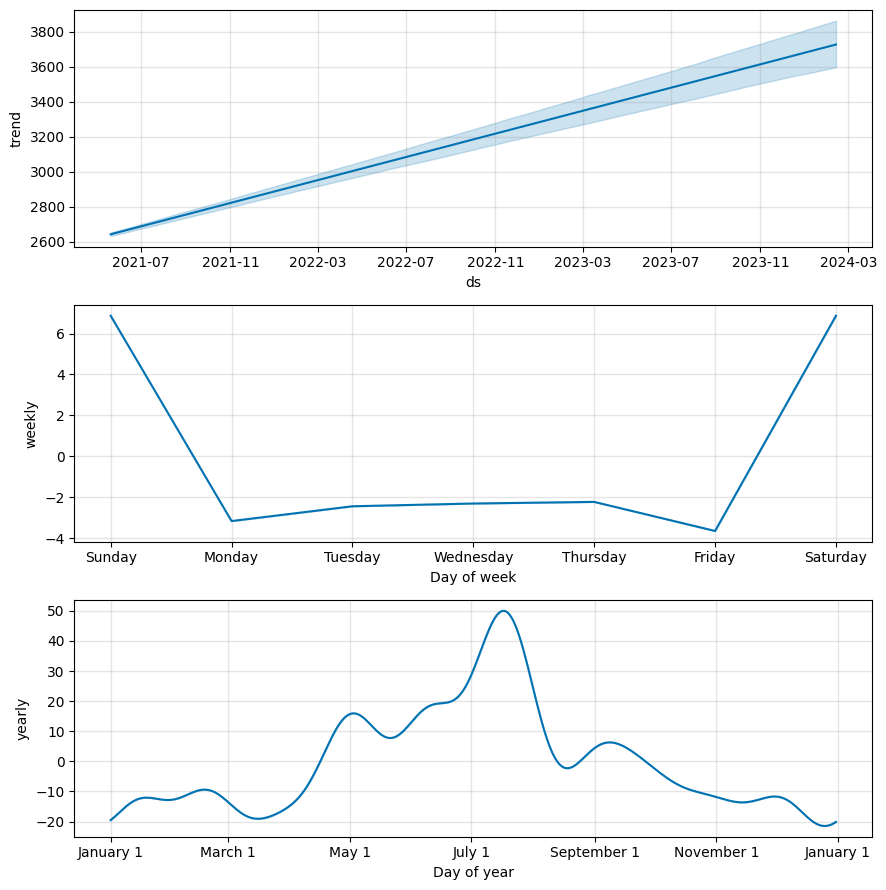

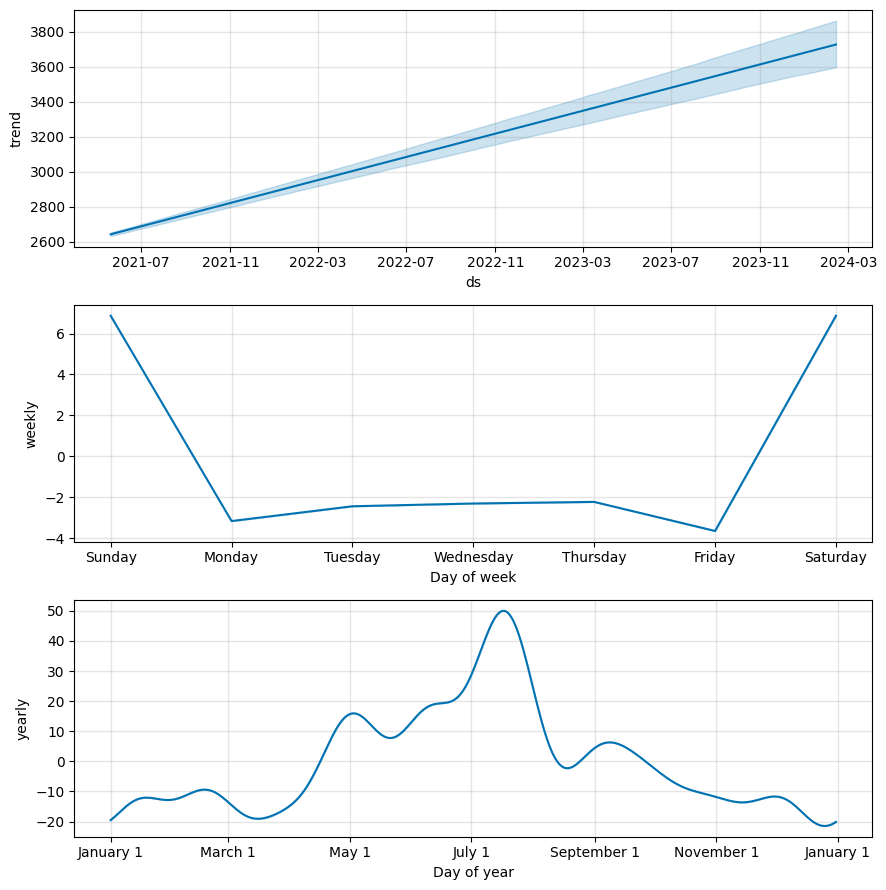

In [173]:
model.plot_components(fg.iloc[-500+idx:idx+500,:])